# Case study - planning a marketing campaign


## Document Structure

1. Case definition and structuration
 * 1\.1 Instructions
 * 1\.2 Questions and answers
 * 1\.3 Approach
 * 1\.4 Results
 
 
2. Data importation
 * 2\.1 import packages
 * 2\.2 pull data from Google BigQuery
 * 2\.3 pre-processing


3. Data exploration
 * 3\.1 seasonality
 * 3\.2 most busy stations at peak season (summer)


4. Modelling
 * 4\.1 assumptions and orders of magnitude
 * 4\.2 feature engineering
 * 4\.3 model 1: each week is treated independently
 * 4\.4 suggested improvements

# 1) Airmet challenge

## 1.1) Instructions
**Airmet - The best helmet is the one that's with you**

Airmet is a London based company that manufactures and resell an inflatable helmet of the same name specially designed for those regular users of cycle and other 2 wheels hire schemes. The Airmet uses cutting edge technology to provide best in class protection to the rider and once deflated takes the shape of a credit card to fit in your wallet so you always have it with you.

**Brief**

The Marketing Director at Airmet wants to launch a new marketing campaign in order to raise awareness and boost acquisition.

His idea, in order to target a relevant audience, is to take over some cycle scheme docking stations and turn them into an ad.

The Director has found a free dataset online detailing historical traffic for all the cycle scheme docking stations in London. As Airmet's go to data guru, you are asked to come up with a recommendation to optimise chances for success of the campaign.

**Facts & Constraints**

- After a year of existence, **5,000** Airmet™️ have been sold, all through their online store
- The Airmet™️ retail price is **£179**
- The cost to take over one full docking station (disregarding the number of docks) will be of **£200** per station per week + a **£100** one off per station for print and set-up
- Overall budget for the campaign is **£50,000**
- There are no constraints around the timing of the campaign

**Deliverables**

You are expected to present your findings and recommendation including :

- Duration of the campaign
- Number of docking stations and specific locations to take over
- Detailed assumptions made in the process

You will also be asked to share the code used to analyse the data

**Assets**

You can find the dataset [here](https://console.cloud.google.com/marketplace/details/greater-london-authority/london-bicycles) and details on how to get started with public-data in BigQuery [here](https://cloud.google.com/bigquery/public-data/). While the dataset seats in BigQuery you are free to use any tool and language of your choice. You are also welcome to use any other relevant public dataset available out there.

Please do reach out if you have any questions.

## 1.2) Refining problem definition - Q&A
### Questions asked

A few structuring questions about the study that I would ask if I was actually designing this campaign.

**(1) Breadth vs repetition**
 * (1.a) For the Airmet product, how does the conversion rate vary with (i) ad impression number and (ii) intensity i.e. frequency, at iso-number? This could come from previous marketing campaigns.
 * (1.b) As only rides are reported, without a customer id, we do not know (i) on a given date how many different customers take a station or their frequency, and (ii) what is the customer replacement rate. As Airmet would be unlikely to know this, I will make assumptions on this (if I do not find the information elsewhere quickly).

_Why is this information impactful?_
_(i)_ If there is no intensity game, and if most customers on a station are fresh everyday or if their need a high number of exposures to ads to convert efficaciously, the strategy could be to keep only a few stations for a long time. _(ii)_ On the other hand, if intensity is required, or if customers stick to the station they use and they do not need a high number of impression to convert (or never convert), we probably ought to run a short campaign on multiple stations at the same time.


**(2) Conversion and profitability**
 * (2.a) For the Airmet product, what are the conversion rates (funnel with ad impression in the street, online store connection and purchase)? This could come from website funnel analysis and previous marketing campaigns
 * (2.b) How are we going to track the campaign (e.g. call to action with unique codes for each station, incentivized by a discount)? This will help understand if we get feedback on how the campaign is doing, which would influence if we can run a minimum viable product and learn how to adapt the campaign rather than burn all the cash.
 * (2.c) Gross profit per helmet

_Why is this information impactful?_
As the campaign is parallelized, the number of people reached per station will go down. Gross profit and conversion rate will help assess how many trips per station per week (or users) are needed for the campaign to be profitable on that station.

**(3) Timing**
 * (3.a) The dataset was last updated in 2017. Are we assuming that we ran the campaign in 2017, with data up to the day of the campaign launch, or do we need to forecast 2018 or even 2019 data?
 * (3.b) No constraints on the timing of the campaign means we can actually pick the best time of the year, even if that was to be in more than 6 months which likely wouldn't make sense for such an early stage startup?



### Answers

 * (1.a) Previous performance marketing campaigns have shown that higher frequency drives higher purchase intent. This is due to Airmet being a new innovative product and the audience needing time to understand the offering and digest the message.

 * (1.b) The dataset is indeed incomplete on that level but it’s all Airmet has managed to get access to. An assumption is expected to be made here.

 * (2.a) Previous performance marketing campaign and website analytics have shown the following :
  * Click-through rate : 1.5%
  * Conversion rate : 5%

 * (2.b) Campaign will be tracked through a unique code for each station incentivised by a 20% off their next month of Cycle Scheme subscription (a deal was cracked with tfl who is keen to use this as a pilot to understand wether advertising on stations could become an interesting new source of revenue for them).

 * (2.c) Gross profit per helmet is £60

 * (3.a) The dataset is indeed incomplete. It is fine to assume that traffic and seasonality remained the same since the last data available for the purpose of this case.

 * (3.b) Even though 6 months is a very long time for an early stage startup, the Marketing director is keen to understand which is the best period in the year to run the campaign.


## 1.3 Approach

**Data structure**
- absent dates is interpreted as absence of bike rides. In this sparse environment where null values need to be replaced by zeros, I have taken the approach to generate a dense matrix of reasonable size on a filtered and aggregated dataset. An alternative would be to work with sparse matrices and models that can handle null values as zeros, but I chose the first one given time constraints and the limited gains.
- aggregate data at the day level initially to understand week seasonality and seasonality through the year
- consider station visits as the sum of rides starting from a station and arriving at it
- consider station and week pairs for ROI predictions

**Modelling**
- **Airmet purchase funnel assumptions**
 - historical click-through-rate = 1.5%
 - modelled view-to-websitelanding = historical click-through-rate / 3 = 0.5%, as there is an extra step between the physical world and having to get on the web (get to phone or computer)  
 - as repeated exposure to ads is known to improve Airmet's conversion rate, I looked for comparable products, and found a Nielson estimate of a fourfold improvement in conversion after 10 ads shown. Ref: https://www.nielsen.com/au/en/insights/news/2017/how-frequency-of-exposure-can-maximise-the-resonance-of-your-digital-campaigns.html  
 - conversion rate between website landing and purchase is 5%, assuming targeting relevance was historically equal to this campaign's targeting
 - gross profit per helmet is GBP60
 
 
- **Model 1 assumptions**
 - riders on week days are assumed to be commuters, and commuters are assumed to take their bike 10x a week (every week day, twice)
 - riders on weekends are assumed to be occasional riders, and those riders are assumed to come to the station only once
 - for each station and week pairs, we calculate the proportion of visitors that came in the weekend vs the week days, and calculate from there the effective conversion rate (given above mentioned frequency improvements)
 - each station and week pair is assumed independant of each other (big simplifying assumption)
 - number of docks does not matter (advertizing density)


- **Suggested improvements for future models**
 - pass from week to week, with lag functions:
    - frequency improvements
    - reduction in the customer base from previous conversions (assuming people do not buy more than 1 helmet)
 - model station connectivity
    - frequency improvements
 - reduction in the customer base from previous conversions
 - plot sensitivities to various assumed variables (passed as argument to grossmargin function)
 - try to model impact of word of mouth

## 1.4 Results and recommendation

Given assumed gross margin per ad view (conversion rates, margins), only a few stations are expected to have enough traffic (particularly commuter traffic) to be profitable.

**With the current assumptions, the overall strategy is to run on only 2 stations (other stations aren't estimated profitable):**
- run for 9 weeks Belgrove Street , King's Cross (station_id=14), starting week 25
    - estimated ROI of +150%
- run for 4 weeks Hyde Park Corner, Hyde Park (station_id=191), starting week 29
    - estimated ROI of +95%

If the conversion rates or gros margin improve, the next stations on the list are:
- run for 3 weeks Black Lion Gate, Kensington Gardens (station_id=307), starting week 29
- run for 2 weeks Albert Gate, Hyde Park (station_id=303), starting week 29
- run for 1 week Waterloo Station 3, Waterloo (station_id=154), starting week 26


**The suggested approach is to**:
- run a limited campaign on only one station first (King's cross, id=14, starting week 25 and until week 28)
- to better estimate the actual gross margin per ad view and station traffic
- then to deploy a better informed strategy at larger scale. 
 - If no change in estimates, keep deployed in Kings cross (9 weeks total), and deploy on week 29 on Hyde Park Corner (for 4 weeks)

# 2) Data importation

## 2.1) import packages

In [34]:
# data manipulation
import numpy as np
import pandas as pd
from datetime import date, timedelta
from math import isnan

# get the data from Google Big Query
from google.cloud import bigquery
from pandas.io import gbq

# times series prediction
from fbprophet import Prophet

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.2) pull data from Google BigQuery

In [14]:
sql = '''

SELECT *
FROM `bigquery-public-data.london_bicycles.cycle_stations`

'''

df_stations = gbq.read_gbq(sql, project_id="airmet-2018-11-17", dialect='standard')
df_stations.head()

,id,install_date,installed,latitude,locked,longitude,name,bikes_count,docks_count,nbEmptyDocks,removal_date,temporary,terminal_name
0,132,2010-07-15,True,51.523648,false,-0.074755,"Bethnal Green Road, Shoreditch",38,38,0,NaT,False,000973
1,144,2010-07-15,True,51.488940,false,-0.111436,"Kennington Cross, Kennington",44,47,1,NaT,False,001093
2,361,2010-12-09,True,51.503920,false,-0.113426,"Waterloo Station 2, Waterloo",53,55,1,NaT,False,002692
3,486,2012-01-23,True,51.525645,false,-0.069543,"Granby Street, Shoreditch",36,37,1,NaT,False,022174
4,262,2010-07-21,True,51.498745,false,-0.103133,"LSBU (Borough Road), Elephant & Castle",33,35,2,NaT,False,001095


In [35]:
# the data is pretty big, so for this first-off analysis we limit ourselves to 2015 onwards
# we will also aggregate data at the day level
# 

sql = '''

SELECT
    TIMESTAMP_TRUNC(start_date, DAY, 'UTC') AS ride_date,
    start_station_id,
    end_station_id,
    COUNT(DISTINCT rental_id) AS rides,
    COUNT(DISTINCT bike_id) AS distinct_bike_id,
    AVG(duration) AS avg_ride_duration
    
FROM `bigquery-public-data.london_bicycles.cycle_hire`
WHERE start_date >= '2015-01-01'
GROUP BY start_station_id, end_station_id, ride_date
ORDER BY start_station_id, end_station_id, ride_date

'''

df_rides = gbq.read_gbq(sql, project_id="airmet-2018-11-17", dialect='standard')
df_rides.head()

INFO:pandas_gbq.gbq:  Elapsed 7.2 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 8.53 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 9.74 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 11.02 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 12.26 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 13.46 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 14.71 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 15.97 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 17.23 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 18.46 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 19.69 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 20.92 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 22.14 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 23.48 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 24.69 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 25.93 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 27.14 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 28.37 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 29.62 s. Waiting...
INFO:pandas_gbq.gbq:  Elapsed 30.82 s. Waiting...
INFO

,ride_date,start_station_id,end_station_id,rides,distinct_bike_id,avg_ride_duration
0,2016-08-31,NaN,NaN,38982,8336,1273.246114
1,2016-09-01,NaN,NaN,39919,8369,1326.203061
2,2016-09-02,NaN,NaN,34260,8009,1229.000000
3,2016-09-03,NaN,NaN,23467,6681,1570.932799
4,2016-09-04,NaN,NaN,27512,6784,1736.397208


In [37]:
# save data locally (cost and time control)
df_stations.to_csv('stations.csv')
df_rides.to_csv('rides.csv')

## 2.3) pre-processing

In [211]:
# convert to datetime
df_rides['ride_date'] = pd.to_datetime(df_rides['ride_date'])

# 3) Data exploration

## 3.1) seasonality

### seasonality of entire network

In [216]:
df_rides.head()

,ride_date,start_station_id,end_station_id,rides,distinct_bike_id,avg_ride_duration
0,2016-08-31,NaN,NaN,38982,8336,1273.246114
1,2016-09-01,NaN,NaN,39919,8369,1326.203061
2,2016-09-02,NaN,NaN,34260,8009,1229.000000
3,2016-09-03,NaN,NaN,23467,6681,1570.932799
4,2016-09-04,NaN,NaN,27512,6784,1736.397208


In [217]:
print(df_rides[['ride_date']].min())
print(df_rides[['ride_date']].max())

ride_date   2015-01-04
dtype: datetime64[ns]
ride_date   2017-06-13
dtype: datetime64[ns]


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


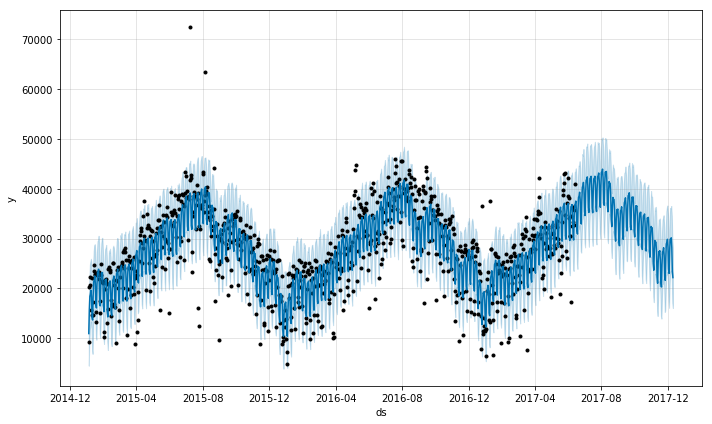

In [218]:
# ----------- missing dates - probably not many at the agglomerated level -----------
d1 = date(2015,1,4)
d2 = date(2017,6,13)
all_dates = pd.DataFrame({'date':pd.to_datetime([d1 + timedelta(days=x) for x in range((d2-d1).days + 1)])})

rides_perday_agglomerated = df_rides.groupby('ride_date')[['rides']].sum().reset_index()
rides_perday_agglomerated_complete = all_dates.merge(rides_perday_agglomerated, left_on='date', right_on='ride_date',
                                                    how='left')
#If a date is missing, we interpret it as no rides that day (e.g. closure)
rides_perday_agglomerated_complete['rides'].fillna(value=0, inplace=True)

# ----------- fit the data with Prophet -----------
# additive regression model that combines nicely trend (piecewise or logistic growth), yearly seasonal component (fourier series), weekly seasonal component (dummy variables) 
rides_perday_agglomerated_prophet = pd.DataFrame({'ds':rides_perday_agglomerated_complete['date'].values, 
                                            'y':rides_perday_agglomerated_complete['rides'].values})

m = Prophet()
m.fit(rides_perday_agglomerated_prophet)
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)
fig1 = m.plot(forecast)

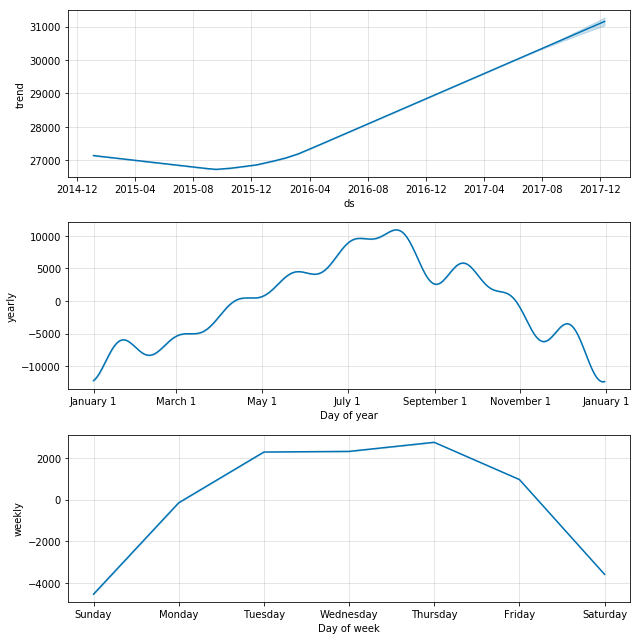

In [219]:
fig2 = m.plot_components(forecast)

overall the network seems dominated by commuters

## 3.2) most busy stations at peak season (summer)

In [221]:
# approach: cartesian product of dates, and stations considered
# to avoid using unnecessary memory, we will perform the join only when the dataset will have been reduced for our speciic purpose

# let us generate all dates
d1 = date(2016,6,20)
d2 = date(2016,8,20)

summer_2016_dates = pd.DataFrame({'date':pd.to_datetime([d1 + timedelta(days=x) for x in range((d2-d1).days + 1)])})
summer_2016_dates.head()

,date
0,2016-06-20
1,2016-06-21
2,2016-06-22
3,2016-06-23
4,2016-06-24


In [246]:
# restrict to peak season for speed
summer_rides = df_rides.loc[df_rides['ride_date'].between(pd.to_datetime('2016-06-20'), pd.to_datetime('2016-08-20'))]

# get number of visits at a station by adding rides coming from and arriving at that station
startstation_rides = summer_rides.groupby(['start_station_id', 'ride_date'])[['rides']].sum().reset_index()
endstation_rides = summer_rides.groupby(['end_station_id', 'ride_date'])[['rides']].sum().reset_index()
station_visit_incomplete = startstation_rides.merge(endstation_rides, left_on=['start_station_id', 'ride_date'],
                                        right_on=['end_station_id', 'ride_date'], how='outer')
# missing values and departure or arrival interpreted as no rides in that direction that day
station_visit_incomplete.update(station_visit_incomplete[['rides_x', 'rides_y']].fillna(value=0))

station_visit_incomplete['station_id'] = station_visit_incomplete.apply(lambda row: next(x for x in [row['start_station_id'], row['end_station_id']] if not isnan(x)), axis=1)

station_visit_incomplete['visits'] = station_visit_incomplete['rides_x'] + station_visit_incomplete['rides_y']

# cartesian product of stations and dates (if data was bigger we could restrict to top stations, but fine here)
active_stations = station_visit_incomplete[['station_id']].drop_duplicates()

summer_2016_dates['key'] = 0
active_stations['key'] = 0

cartesian_product = summer_2016_dates.merge(active_stations, how='left', on='key')

cartesian_product.drop('key', axis=1, inplace=True)
summer_2016_dates.drop('key', axis=1, inplace=True)

# merge rides and dates
station_visits = cartesian_product.merge(station_visit_incomplete[['station_id', 'ride_date', 'visits']], 
                                        left_on=['station_id', 'date'], right_on=['station_id', 'ride_date'],
                                        how='left')
station_visits['visits'].fillna(value=0, inplace=True)
station_visits.drop('ride_date', axis=1, inplace=True)
station_visits.head()

,date,station_id,visits
0,2016-06-20,1.0,31.0
1,2016-06-20,2.0,67.0
2,2016-06-20,3.0,63.0
3,2016-06-20,4.0,51.0
4,2016-06-20,5.0,100.0


In [247]:
mean_visits_perday = station_visits.groupby('station_id')[['visits']].mean()
mean_visits_perday.sort_values(by='visits', ascending=False).head(10)

,visits
station_id,
191.0,645.064516
14.0,598.500000
303.0,574.612903
307.0,573.177419
154.0,484.838710
248.0,469.790323
213.0,452.629032
785.0,437.854839
194.0,414.080645


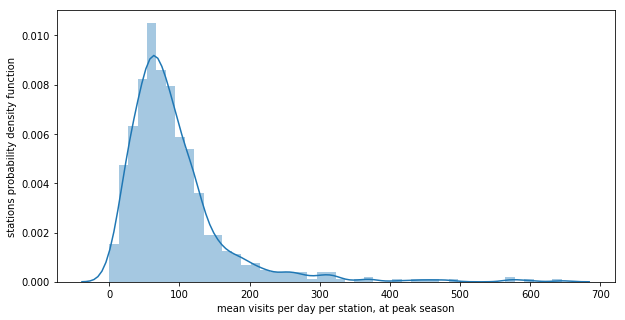

In [385]:
plt.figure(figsize=(10,5))
sns.distplot(mean_visits_perday)
plt.xlabel('mean visits per day per station, at peak season'); plt.ylabel('stations probability density function');
plt.show()

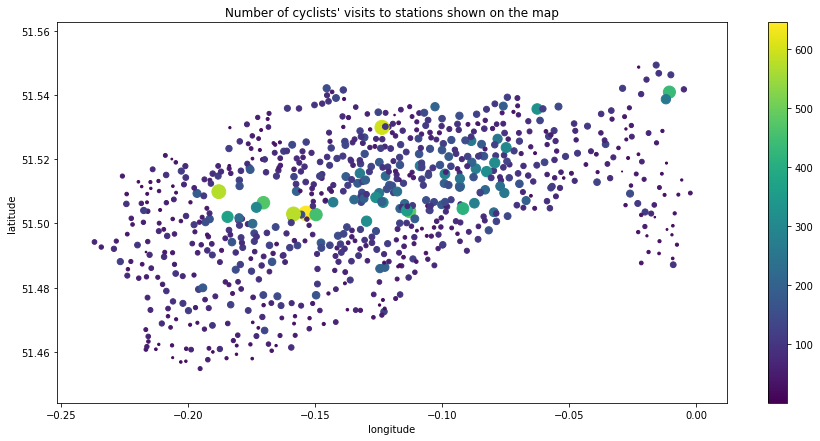

In [252]:
# visualization on a map of where each station is located, and what is its mean number of visitor per day
startstation_augmented = mean_visits_perday.merge(df_stations, how='inner', left_on='station_id', right_on='id')

plt.figure(figsize=(15,7))
plt.scatter(x=startstation_augmented['longitude'], y=startstation_augmented['latitude'], 
            s=startstation_augmented['visits']/3, c=startstation_augmented['visits'])
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Number of cyclists' visits to stations shown on the map")
plt.show()

# 4) Modelling

## 4.1) assumptions and orders of magnitude

In [365]:
installation_cost_perstation = 100

# in the absence of better estimates, we will assume that online behaviors are mostly replicated in the real world
# let's assume that street advertizing creates an extra barrier to purchase, as users need to navigate to website
view_to_website = 0.015 / 3
website_conversion_rate = 0.05 # we assume the online advertising was equally or less targeted than this campaign
gross_profit_perhelmet = 60
cost_per_week = 200

gross_profit_perview = gross_profit_perhelmet * website_conversion_rate * view_to_website
dailyviews_forbreakeven = (cost_per_week / 7) / gross_profit_perview

print('Estimated gross profit per view GBP', gross_profit_perview)
print('Estimated number of daily views per station to breakeven', dailyviews_forbreakeven)

Estimated gross profit per view GBP 0.015
Estimated number of daily views per station to breakeven 1904.761904761905


In [267]:
# if focus on top 10 stations
print('mean summer visits for top 10 stations :', mean_visits_perday.sort_values(by='visits', ascending=False).head(10).mean().values[0])
print('mean summer visits for top 2 stations :', mean_visits_perday.sort_values(by='visits', ascending=False).head(2).mean().values[0])
print('mean summer visits for top 1 stations :', mean_visits_perday.sort_values(by='visits', ascending=False).head(1).mean().values[0])

mean summer visits for top 10 stations : 502.3161290322581
mean summer visits for top 2 stations : 621.7822580645161
mean summer visits for top 1 stations : 645.0645161290323


## 4.2) feature engineering

In [302]:
station_visits['day_of_week'] = station_visits['date'].apply(lambda x: x.weekday())
station_visits['week'] = station_visits['date'].apply(lambda x: x.week)
station_visits['weekend_flag'] = station_visits['day_of_week'].apply(lambda x: 1 if x>=5 else 0)
station_visits.sort_values(by=['station_id', 'date']).head(7)

,date,station_id,visits,day_of_week,week,weekend_flag
0,2016-06-20,1.0,31.0,0,25,0
786,2016-06-21,1.0,40.0,1,25,0
1572,2016-06-22,1.0,36.0,2,25,0
2358,2016-06-23,1.0,26.0,3,25,0
3144,2016-06-24,1.0,48.0,4,25,0
3930,2016-06-25,1.0,22.0,5,25,1
4716,2016-06-26,1.0,36.0,6,25,1


In [344]:
def weekend_usage_proportion(x):
    calculated_weights = station_visits.loc[x.index, "visits"]
    
    # if a station wasn't used on a certain week, we define the usage proportion to be week only
    # this is arbitrary, but will not have any impact given our future usage
    if calculated_weights.sum() == 0:
        return 0
    else:
        return np.average(x, weights=calculated_weights)

station_visits_week = station_visits.groupby(['station_id', 'week']).agg({'weekend_flag':weekend_usage_proportion, 'visits':sum})
station_visits_week.reset_index(inplace=True)
station_visits_week.rename(columns={'weekend_flag':'weekend_usage_proportion'}, inplace=True)
station_visits_week = station_visits_week.merge(df_stations[['id', 'name']], left_on='station_id', right_on='id',
                                               how='inner')
station_visits_week.drop(columns='id', inplace=True)
station_visits_week.head()

,station_id,week,weekend_usage_proportion,visits,name
0,1.0,25,0.242678,239.0,"River Street , Clerkenwell"
1,1.0,26,0.271084,332.0,"River Street , Clerkenwell"
2,1.0,27,0.209596,396.0,"River Street , Clerkenwell"
3,1.0,28,0.221538,325.0,"River Street , Clerkenwell"
4,1.0,29,0.250000,352.0,"River Street , Clerkenwell"


In [383]:
# estimated on Nielson data on consummer goods and electronics
# https://www.nielsen.com/au/en/insights/news/2017/how-frequency-of-exposure-can-maximise-the-resonance-of-your-digital-campaigns.html 
lift_for10views_perperson = (20 / 5) 
lift_for10views_perperson

4.0

## 4.3) model 1: each week is treated independently

In [353]:
def estimated_grossmargin_independantweeks(row, lift_for10views_perperson_param = lift_for10views_perperson, 
                          gross_profit_perview_param = gross_profit_perview, cost_per_week_param = cost_per_week):
    '''
    
    For this first model, all customers assumed to be new every new week.
    
    Weekend customers are assumed to be fully new users, and weekday customers are assumed to come 10 times a week
    (comes from assumed commuter and entertainment usage patterns)
    
    Repeat viewership is modelled to generate a substantial lift
    
    '''
    
    return row['visits'] * gross_profit_perview_param * (1*row['weekend_usage_proportion'] + 
         lift_for10views_perperson_param*(1-row['weekend_usage_proportion'])) - cost_per_week_param

In [354]:
station_visits_week['estimated_grossmargin_independantweeks'] = station_visits_week.apply(estimated_grossmargin_independantweeks, axis=1)
station_visits_week.sort_values(by='estimated_grossmargin_independantweeks', ascending=False).head(30)

,station_id,week,weekend_usage_proportion,visits,name,estimated_grossmargin_independantweeks
1627,191.0,32,0.404012,6730.0,"Hyde Park Corner, Hyde Park",81.445
1624,191.0,29,0.000000,4271.0,"Hyde Park Corner, Hyde Park",56.260
119,14.0,27,0.097898,4566.0,"Belgrove Street , King's Cross",53.845
1625,191.0,30,0.452327,6146.0,"Hyde Park Corner, Hyde Park",43.660
121,14.0,29,0.112702,4401.0,"Belgrove Street , King's Cross",41.740
2587,307.0,29,0.399568,5561.0,"Black Lion Gate, Kensington Gardens",33.670
120,14.0,28,0.097826,4140.0,"Belgrove Street , King's Cross",30.175
118,14.0,26,0.095897,4119.0,"Belgrove Street , King's Cross",29.365
124,14.0,32,0.119302,4124.0,"Belgrove Street , King's Cross",25.300
122,14.0,30,0.145403,4209.0,"Belgrove Street , King's Cross",25.000


In [382]:
station_visits_week_model1profitable = station_visits_week[station_visits_week['estimated_grossmargin_independantweeks']>0]
station_visits_week_model1profitable = station_visits_week_model1profitable.groupby(['station_id', 'name'])[
    ['estimated_grossmargin_independantweeks', 'visits', 'week']].agg({'estimated_grossmargin_independantweeks':{
    'number_week':'count', 'grossmargin_perstation':'sum'}, 'visits':{'mean_weekly_visits':'mean'},
                                                             'week':{'first_week':'min'}}).reset_index()
station_visits_week_model1profitable['grossmargin_perstation_withinstallationcost'] = station_visits_week_model1profitable['grossmargin_perstation'] - installation_cost_perstation
station_visits_week_model1profitable['ROI'] = station_visits_week_model1profitable['grossmargin_perstation_withinstallationcost'] / installation_cost_perstation
station_visits_week_model1profitable.sort_values(by='grossmargin_perstation_withinstallationcost', ascending=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,station_id,name,number_week,grossmargin_perstation,mean_weekly_visits,first_week,grossmargin_perstation_withinstallationcost,ROI
0,14.0,"Belgrove Street , King's Cross",9,246.150,4123.000000,25,146.150,1.46150
2,191.0,"Hyde Park Corner, Hyde Park",4,195.385,5178.500000,29,95.385,0.95385
4,307.0,"Black Lion Gate, Kensington Gardens",3,49.695,5240.666667,29,-50.305,-0.50305
3,303.0,"Albert Gate, Hyde Park",2,45.740,5555.000000,29,-54.260,-0.54260
1,154.0,"Waterloo Station 3, Waterloo",3,23.640,3581.666667,26,-76.360,-0.76360


## 4.4) suggested improvements
- pass from week to week, with lag functions:
    - frequency improvements
    - reduction in the customer base from previous conversions (assuming people do not buy more than 1 helmet)
- model station connectivity
    - frequency improvements
    - reduction in the customer base from previous conversions
- plot sensitivities to various assumed variables (passed as argument to grossmargin function)
- try to model impact of word of mouth